# [Exercise 0](https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Exercises/E00_linear_regression.ipynb#scrollTo=XaaBo62vK1Bp)

In [190]:
import matplotlib.pyplot as pyplot
import numpy
import pandas
import seaborn

## 0

### a)

In [191]:
numpy.random.seed(42)
x_minutes_per_month = numpy.abs(numpy.random.normal(loc=100, scale=100, size=(400)))
x_minutes_per_month[:5]

array([149.6714153 ,  86.17356988, 164.76885381, 252.30298564,
        76.58466253])

In [192]:
randomized_error = numpy.random.normal(loc=0, scale=50, size=(400))
randomized_error[:5]

array([-79.72138294, -29.96875115,   0.26218499,   2.34902969,
       -22.50327357])

In [193]:
y_sek_per_month = 2 * x_minutes_per_month + 25 + randomized_error

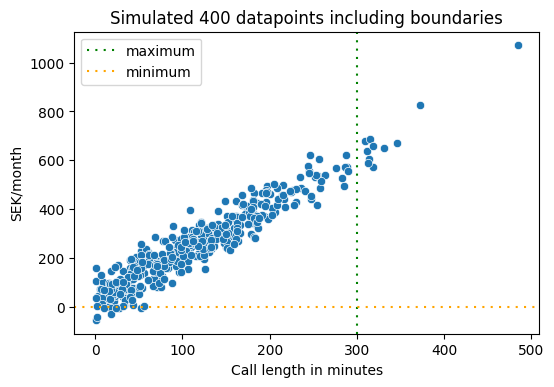

In [194]:
fig, ax = pyplot.subplots(dpi=100)
seaborn.scatterplot(x=x_minutes_per_month, y=y_sek_per_month)
ax.set(
    title="Simulated 400 datapoints including boundaries",
    xlabel="Call length in minutes",
    ylabel="SEK/month",
)
ax.axvline(300, dashes=(1, 3), color="green", label="maximum")
ax.axhline(0, dashes=(1, 3), color="orange", label="minimum")
ax.legend()

### b)

In [195]:
# remove over 300 min
# remove costs that are negative
clean_statement = (0 <= x_minutes_per_month) & (x_minutes_per_month <= 300)
x_minutes_per_month_cleaned = x_minutes_per_month[clean_statement]
y_sek_per_month_cleaned = y_sek_per_month[clean_statement]
len(x_minutes_per_month_cleaned), len(y_sek_per_month_cleaned), len(x_minutes_per_month), len(y_sek_per_month)

(389, 389, 400, 400)

In [196]:
y_sek_per_month_ground_truth = 2 * x_minutes_per_month + 25

(0.0, 300.0)

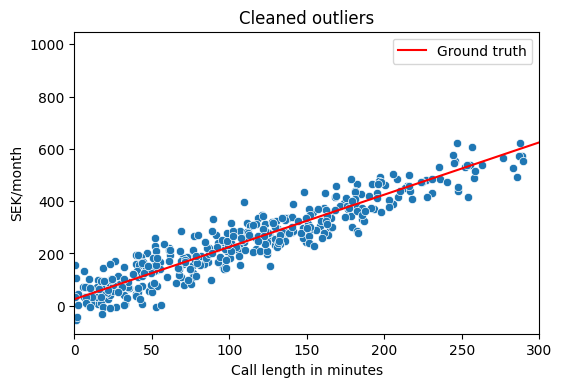

In [197]:
fig, ax = pyplot.subplots(dpi=100)
seaborn.scatterplot(x=x_minutes_per_month_cleaned, y=y_sek_per_month_cleaned)
seaborn.lineplot(x=x_minutes_per_month, y=y_sek_per_month_ground_truth, color='red', label='Ground truth')
ax.set(
    title="Cleaned outliers",
    xlabel="Call length in minutes",
    ylabel="SEK/month",
)
ax.legend()
pyplot.xlim(0,300)

### c)

In [203]:
y_sek_per_month_cleaned.shape, x_minutes_per_month_cleaned.shape

((389,), (389,))

In [218]:
phone_data_month = pandas.DataFrame({'Minutes':x_minutes_per_month_cleaned, 'Cost':y_sek_per_month_cleaned})
phone_data_month.head()

,Minutes,Cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


## 1

### a)

In [263]:
def train_test_split(
    X: pandas.DataFrame,
    y: pandas.DataFrame,
    train_fraction: float = 0.7,
    random_state: int = 42,
    replace=False,
):
    def sample(df: pandas.DataFrame):
        return df.sample(
            n=int(len(df * train_fraction)), random_state=random_state, replace=False
        )

    X_train, y_train = (sample(X), sample(y))

    X.drop(X_train.index)
    y.drop(y_train.index)
    X_test, y_test = (X, y)

    return {
        "train_data": {"X": X_train, "y": y_train},
        "test_data": {"X": X_test, "y": y_test},
    }


phone_data_month_train_test_split = train_test_split(
    X=pandas.DataFrame(phone_data_month["Minutes"]),
    y=pandas.DataFrame(phone_data_month["Cost"]),
)
train_data = phone_data_month_train_test_split["train_data"]
test_data = phone_data_month_train_test_split["test_data"]
train_data['X'], test_data['X']

(        Minutes
 271  106.980208
 46    53.936123
 167   24.626384
 42    88.435172
 350   17.276906
 ..          ...
 71   253.803657
 106  288.618590
 270   39.978312
 348   71.134136
 102   65.728548
 
 [389 rows x 1 columns],
         Minutes
 0    149.671415
 1     86.173570
 2    164.768854
 3    252.302986
 4     76.584663
 ..          ...
 384   53.082435
 385   71.313453
 386  235.387237
 387   88.546015
 388  223.781631
 
 [389 rows x 1 columns])